In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
np.set_printoptions(precision=6)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the dataset
df = pd.read_csv(r'HousingData.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

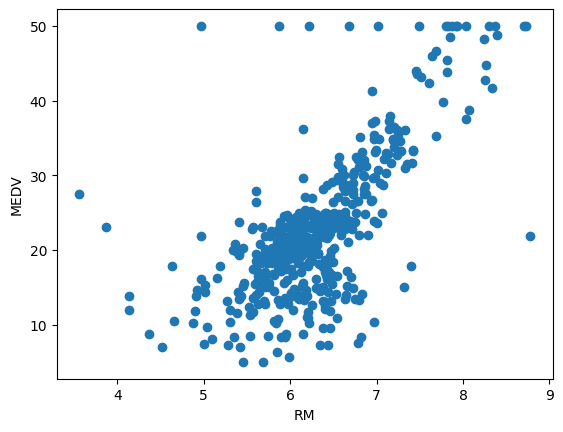

In [8]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

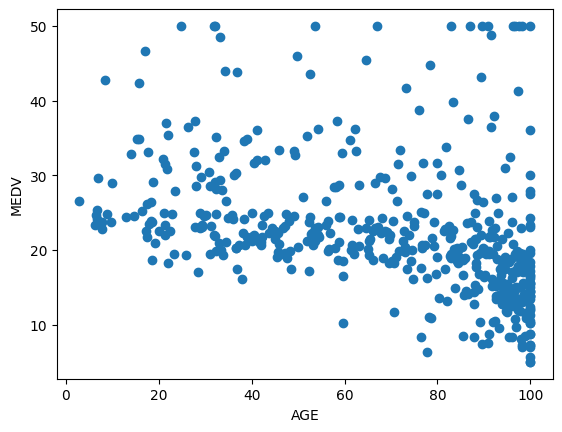

In [9]:
plt.scatter(df['AGE'], df['MEDV'])
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
features = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

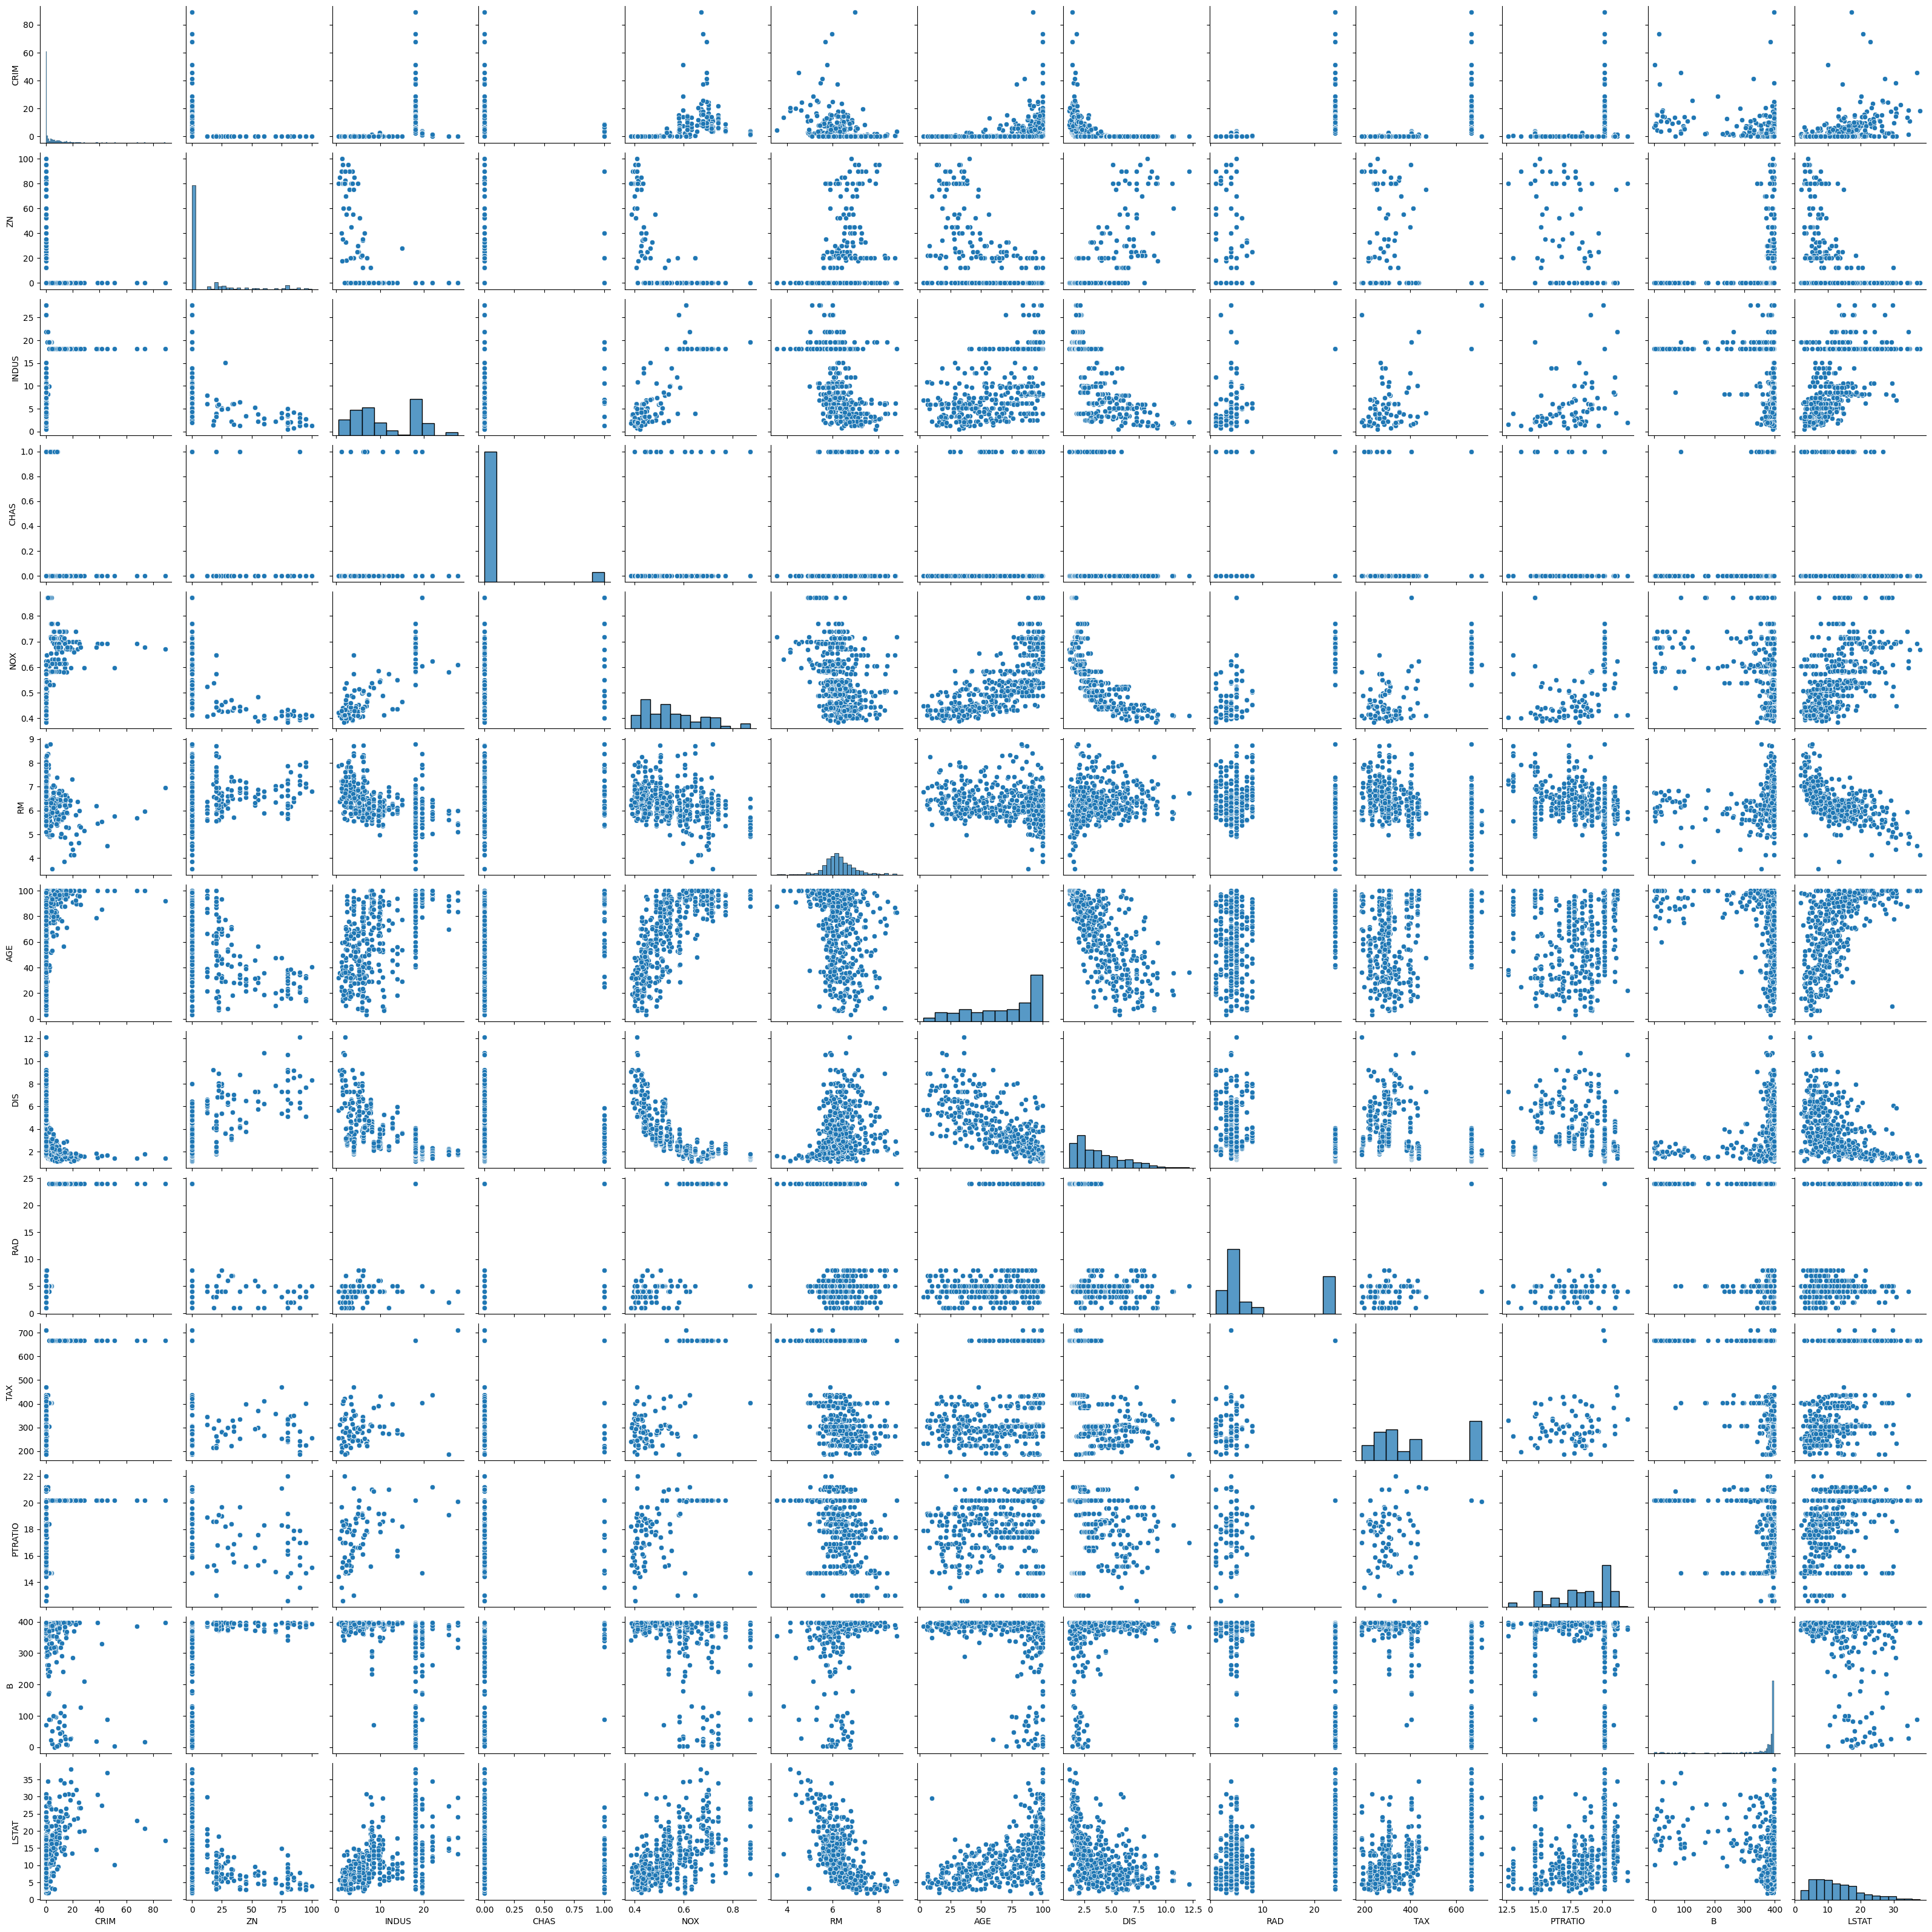

In [12]:
sns.pairplot(features)

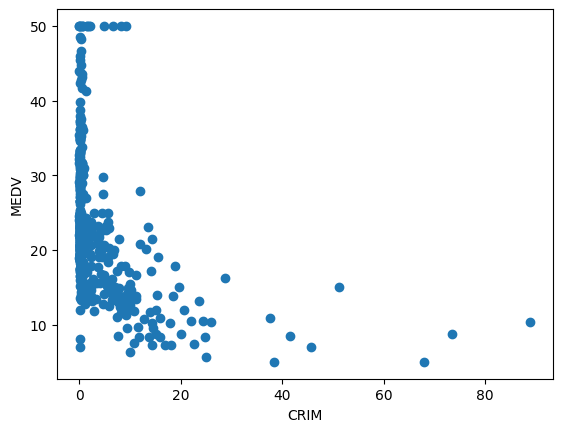

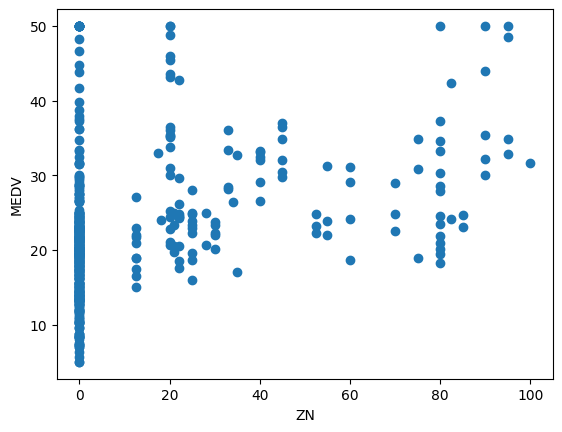

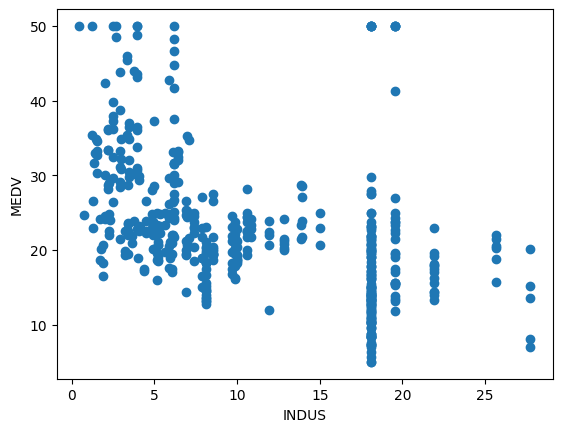

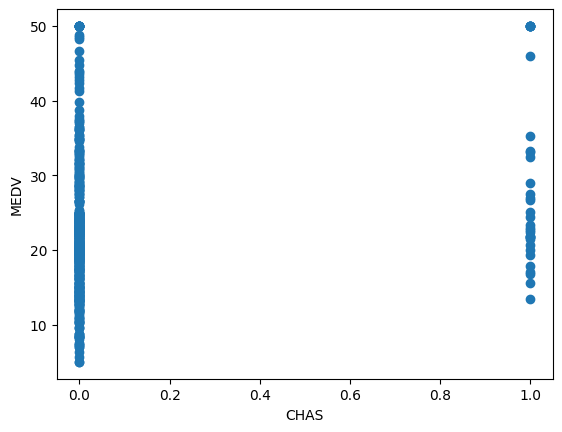

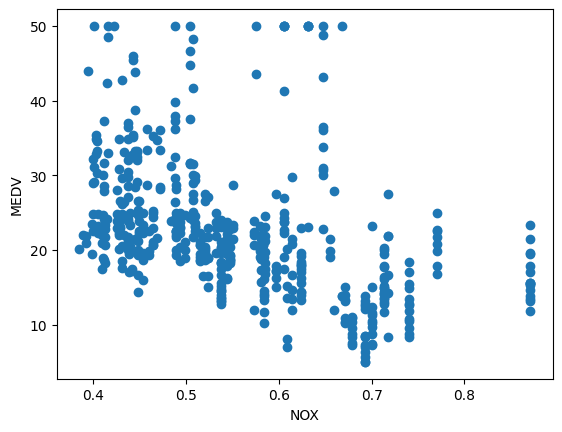

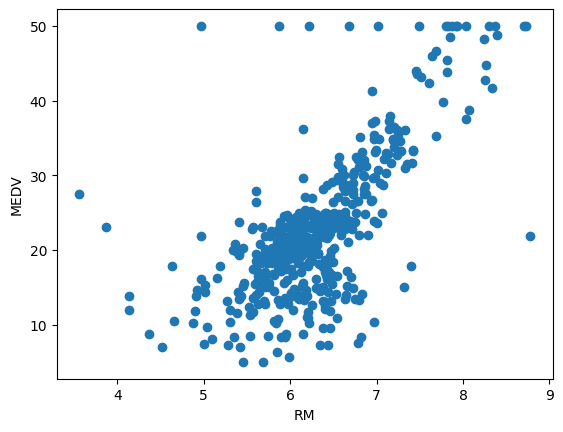

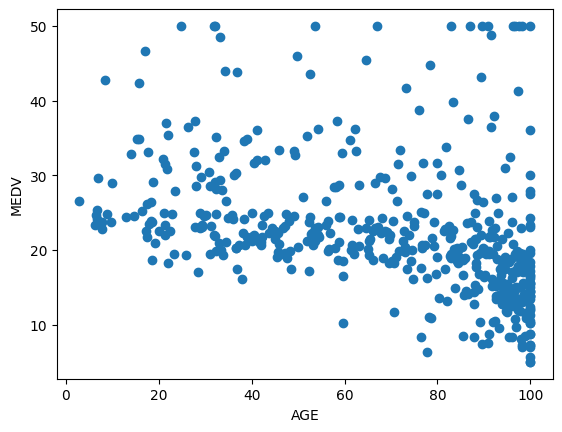

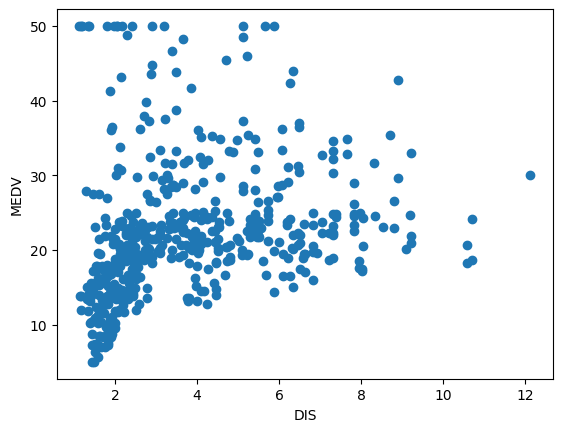

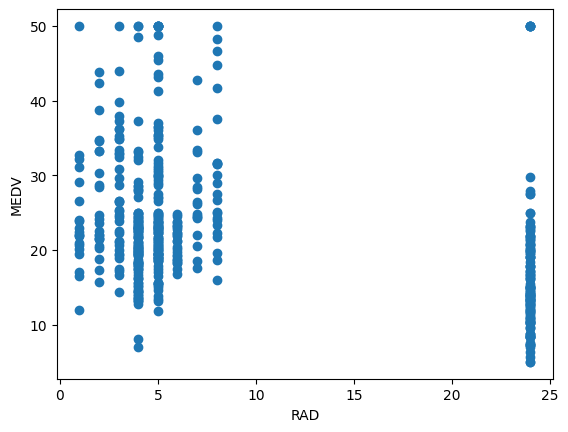

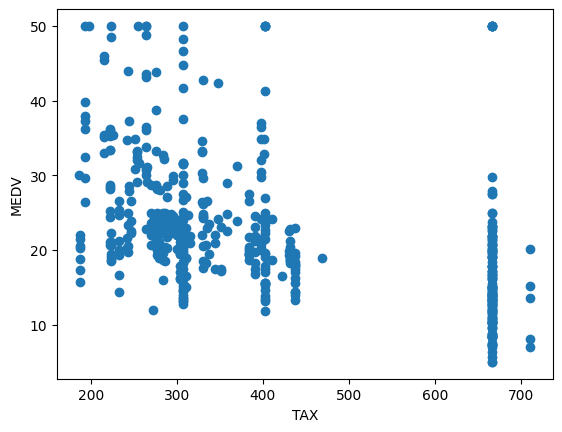

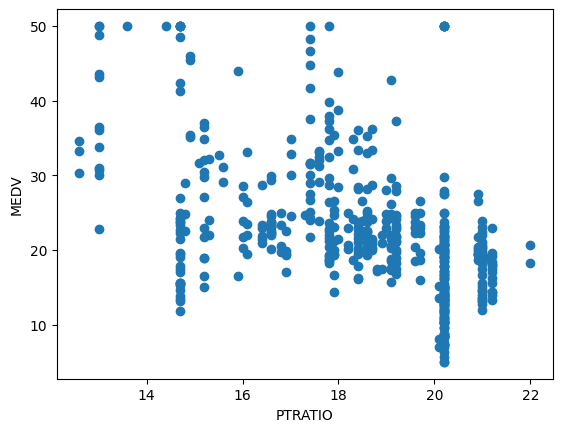

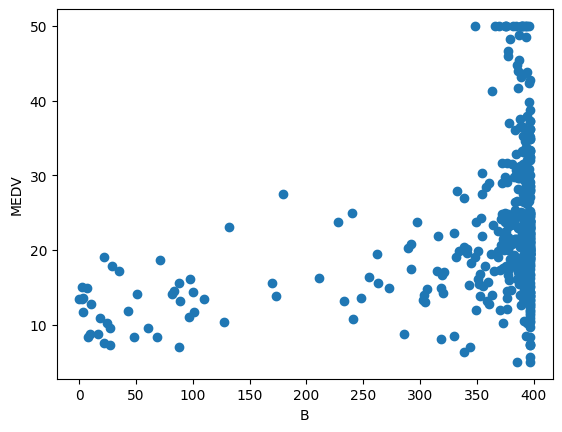

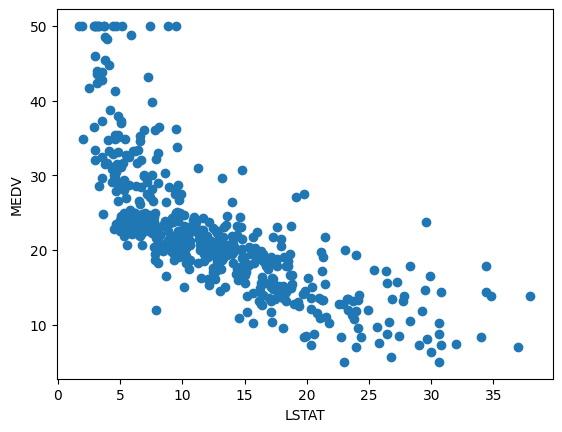

In [13]:
for col in features.columns:

    plt.scatter(df[col], df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()
    
    print('\n')

In [12]:
x = df[['DIS']].values.reshape(-1, 1)
x.shape

(506, 1)

In [13]:
y = df[['MEDV']].values.reshape(-1, 1)
y.shape

(506, 1)

In [14]:
# min-max scaling
def get_scaled_feature(X: np.array):
    mn = np.min(X, axis=0)
    mx = np.max(X, axis=0)
    
    return (X - mn) / (mx - mn)

In [15]:
x = get_scaled_feature(X=x)
x.shape

(506, 1)

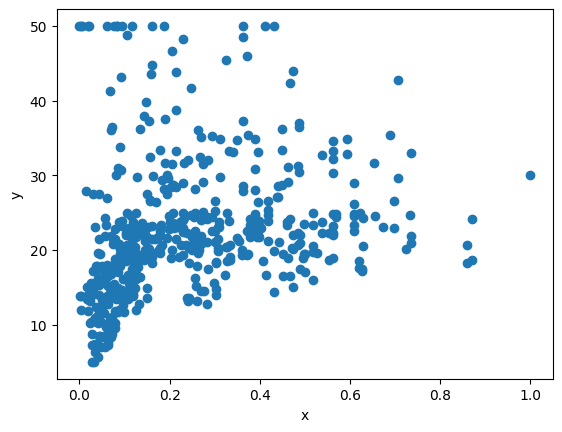

In [16]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
x_sqrt = np.sqrt(x)

In [18]:
x_sqrt.shape

(506, 1)

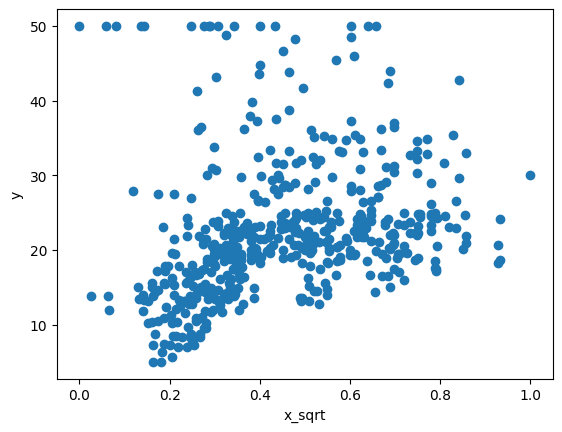

In [19]:
plt.scatter(x_sqrt, y)
plt.xlabel('x_sqrt')
plt.ylabel('y')
plt.show()

In [20]:
poly = PolynomialFeatures(degree=9)
X = poly.fit_transform(x.reshape(-1, 1))
X.shape

(506, 10)

In [21]:
X = np.hstack((X, x_sqrt))

In [22]:
X.shape, y.shape

((506, 11), (506, 1))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=47)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 11), (127, 11), (379, 1), (127, 1))

In [25]:
theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
theta

array([[-0.610344],
       [-0.09596 ],
       [-0.639645],
       [-0.464052],
       [-0.620159],
       [-0.124283],
       [-0.128612],
       [-0.466219],
       [-0.502512],
       [-0.667996],
       [-0.511942]])

In [26]:

def cost_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./2*m) * np.sum(diff**2)
    
    return cost


def gradient_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient

In [27]:

def train(X_train, y_train, n_iterations: int=10000, lr: float=0.0001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [28]:
n_iterations = 80000

opt_theta, cost = train(X_train=X_train, y_train=y_train, n_iterations=n_iterations)

The cost at 0th iteration is 46021539.99618659
Theta: [[-0.338922 -0.689732 -0.758719 -0.479422 -0.194037 -0.277275 -0.693631
  -0.429941 -0.953335 -0.165549 -0.90638 ]]
************************************************

The cost at 10th iteration is 45917707.8647998
Theta: [[-0.315423 -0.683584 -0.756237 -0.478153 -0.193281 -0.276772 -0.693266
  -0.429658 -0.953104 -0.165351 -0.895244]]
************************************************

The cost at 20th iteration is 45814143.94714689
Theta: [[-0.291955 -0.677444 -0.753759 -0.476886 -0.192526 -0.27627  -0.692902
  -0.429375 -0.952873 -0.165154 -0.884122]]
************************************************

The cost at 30th iteration is 45710847.55034645
Theta: [[-0.268517 -0.671312 -0.751284 -0.47562  -0.191772 -0.275768 -0.692538
  -0.429093 -0.952642 -0.164957 -0.873015]]
************************************************

The cost at 40th iteration is 45607817.983307004
Theta: [[-0.245109 -0.665188 -0.748812 -0.474356 -0.191019 -0.275267 

In [29]:
opt_theta

array([[18.024136],
       [ 3.751661],
       [ 0.451138],
       [-0.132613],
       [-0.10057 ],
       [-0.260521],
       [-0.696222],
       [-0.431888],
       [-0.947686],
       [-0.150253],
       [ 7.825513]])

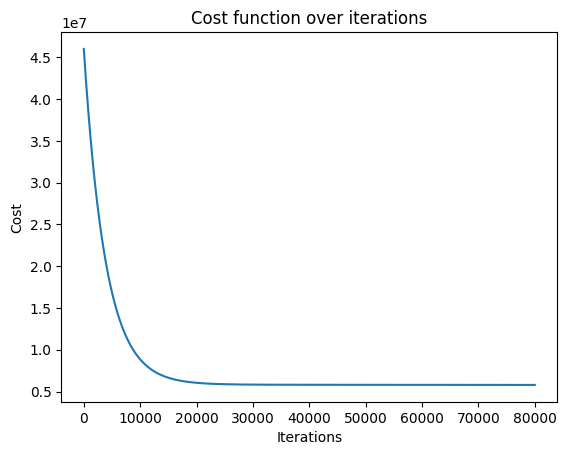

In [30]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [31]:
y_train_pred = np.dot(opt_theta.T, X_train.T)
y_train_pred.shape, y_train.shape

((1, 379), (379, 1))

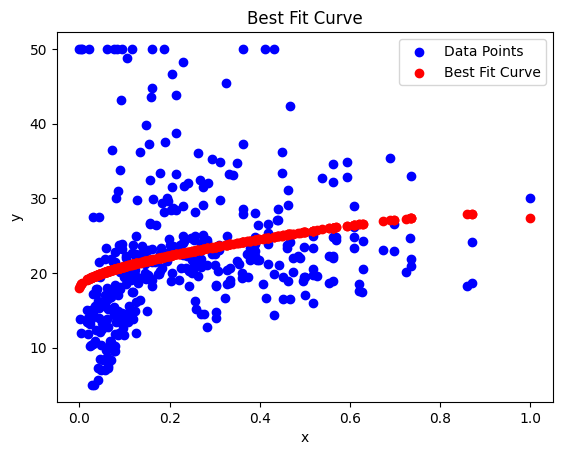

In [32]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [33]:
y_pred = np.dot(opt_theta.T, X_test.T)
y_pred.shape, y_test.shape

((1, 127), (127, 1))

In [34]:
diff = y_pred - y_test.T
sq_error = np.sum(diff**2)
mse = sq_error / y_test.shape[0]
mse

70.93413352381224

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
# using sklearn
mean_squared_error(y_pred=y_pred, y_true=y_test.T)

70.93413352381224

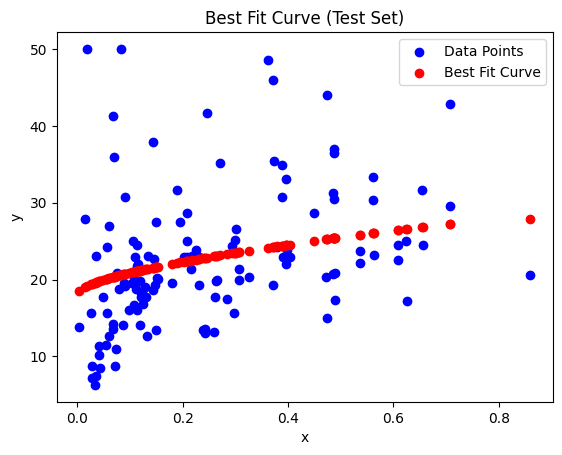

In [37]:
# Plot the original data points
plt.scatter(X_test[:, 1], y_test[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_test[:, 1], y_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve (Test Set)')

# Show the legend
plt.legend()
plt.show()

##### Regularization

In [42]:

def regularized_cost_fn(theta: np.array, X: np.array, y: np.array, lambda_: float, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    # let's calculate the regularization term
    regularized_term = (lambda_/(2*m)) * np.dot(theta.T, theta)
    
    cost = (1.0/(2*m)) * np.sum(diff**2) + regularized_term
    
    return cost.item()

In [43]:

def train_with_regularization(X_train, y_train, n_iterations: int=10000, lr: float=0.0001, 
                            lambda_: float=0.1, m: int=X_train.shape[0]):
    
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = regularized_cost_fn(theta=theta, X=X_train, y=y_train, lambda_=lambda_)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # calculate the fraction
        frac = lr * (lambda_/m)
        
        # update the theta 
        theta = theta * (1 - frac) - (lr * gradient)
    
    return theta, np.array(costs)

In [69]:
n_iterations = 80000

theta_regularized, cost_regularized = train_with_regularization(X_train=X_train, 
                                                                y_train=y_train, 
                                                                n_iterations=n_iterations,
                                                                lambda_=1,
                                                                lr=0.0001
                                                                )

The cost at 0th iteration is 321.01562166625695
Theta: [[-0.655914 -0.645181 -0.640518 -0.79777  -0.09489  -0.500911 -0.824772
  -0.487249 -0.576282 -0.439806 -0.300786]]
************************************************

The cost at 10th iteration is 320.2910158082731
Theta: [[-0.632374 -0.639042 -0.638043 -0.796503 -0.094136 -0.500408 -0.824407
  -0.486966 -0.57605  -0.439607 -0.289653]]
************************************************

The cost at 20th iteration is 319.5682855090563
Theta: [[-0.608864 -0.632911 -0.63557  -0.795238 -0.093383 -0.499906 -0.824041
  -0.486682 -0.575817 -0.439409 -0.278534]]
************************************************

The cost at 30th iteration is 318.8474259135738
Theta: [[-0.585384 -0.626787 -0.633101 -0.793975 -0.092632 -0.499404 -0.823676
  -0.4864   -0.575586 -0.439211 -0.26743 ]]
************************************************

The cost at 40th iteration is 318.12843217936006
Theta: [[-0.561935 -0.620672 -0.630636 -0.792714 -0.091882 -0.49890

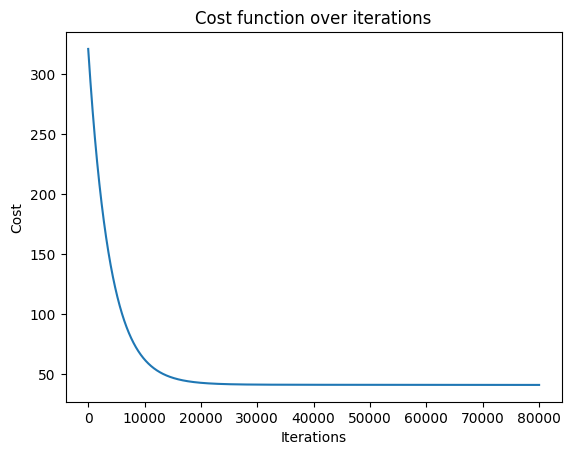

In [70]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost_regularized)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [71]:
y_train_pred_reg = np.dot(theta_regularized.T, X_train.T)
y_train_pred_reg.shape, y_train.shape

((1, 379), (379, 1))

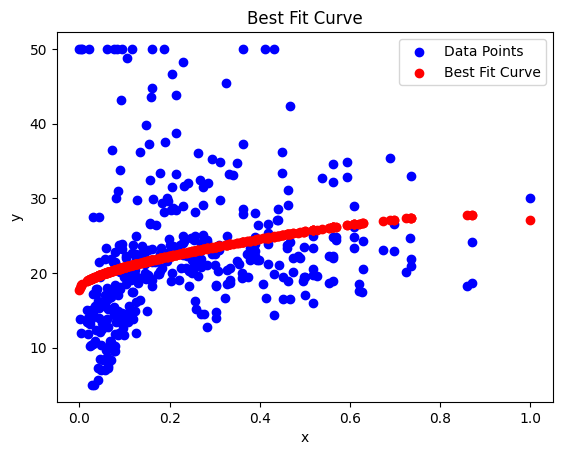

In [72]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred_reg.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [73]:
# optimal theta with regularization
theta_regularized

array([[ 1.777039e+01],
       [ 3.699989e+00],
       [ 5.260997e-01],
       [-4.615749e-01],
       [-1.261900e-02],
       [-4.797986e-01],
       [-8.125041e-01],
       [-4.793265e-01],
       [-5.577333e-01],
       [-4.137825e-01],
       [ 8.320516e+00]])

In [74]:
# optimal theta without regularization
opt_theta

array([[18.024136],
       [ 3.751661],
       [ 0.451138],
       [-0.132613],
       [-0.10057 ],
       [-0.260521],
       [-0.696222],
       [-0.431888],
       [-0.947686],
       [-0.150253],
       [ 7.825513]])

##### Using Sklearn

In [75]:
## using sklearn

model = LinearRegression()

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [40.773002]
Coefficient: [-2.956301e+02  1.430895e+04 -1.325199e+05  6.236560e+05 -1.704300e+06
  2.808765e+06 -2.748238e+06  1.468234e+06 -3.294671e+05 -1.533074e+02]


In [77]:
from sklearn.linear_model import SGDRegressor

In [78]:
model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.0001)

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [17.902199]
Coefficient: [ 3.701219  0.453479 -0.261336 -0.377332 -0.353812 -0.302558 -0.251529
 -0.207036 -0.169621  8.116646]
